SQL Homework - Employee Database: A Mystery in Two Parts

SQL database from postgreSQL to Pandas

## My analysis
* Thats insteresting how to connect to the database, obtain all the tables and use all the data ans also improve for all the knowledge before.


In [38]:
# Requires install for SQLALchemy
#!pip install psycopg2 sqlalchemy

In [52]:
# Important note, is neccesary use a password for connect to postgres

In [2]:
# Import dependencies for pandas, numpy, matplotlib, config and sqlalchemy.  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from config import pw
from sqlalchemy import create_engine

In [3]:
# Do engine and connection
engine = create_engine(f'postgres://postgres:@localhost:5432/sql-challenge')
conn = engine.connect()

In [49]:
#Check the table salaries
salaries_table=pd.read_sql("select * from salaries;",conn)
salaries_table

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12
...,...,...,...,...
300019,499995,40000,1997-06-02,1998-06-02
300020,499996,58058,1996-05-13,1997-05-13
300021,499997,49597,1987-08-30,1988-08-29
300022,499998,40000,1993-12-27,1994-12-27


In [39]:
#Query to salaries table to obtain salary 
salaries = pd.read_sql("SELECT emp_no,salary FROM salaries", conn)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [46]:
#Check table title
all_titles=pd.read_sql("select * from titles",conn)
all_titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [47]:
#Doing a merge with both tables salaries and titles
merged = pd.merge(salaries,titles, on="emp_no",how="inner")
merged.head()

,emp_no,salary,title,from_date,to_date
0,10001,60117,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,Staff,1996-08-03,9999-01-01
2,10003,40006,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,Engineer,1986-12-01,1995-12-01
4,10004,40054,Senior Engineer,1995-12-01,9999-01-01


In [48]:
#Doing average about all grouped from the merge 
all_grouped = merged.groupby("title").mean()
all_grouped

,emp_no,salary
title,,
Assistant Engineer,251495.398533,48493.204786
Engineer,252943.159987,48539.781423
Manager,110780.833333,51531.041667
Senior Engineer,253034.375949,48506.751806
Senior Staff,253423.367183,58503.286614
Staff,253399.240672,58465.271904
Technique Leader,251708.951052,48580.505772


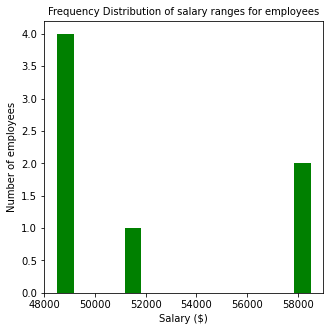

In [53]:
#Create a histogram to visualize the most common salary ranges for employees.
plt.figure(figsize=(5,5))
plt.hist(all_grouped["salary"],color="green",bins=15)
plt.ylabel("Number of employees",fontsize=10)
plt.xlabel("Salary ($)",fontsize=10)
plt.title("Frequency Distribution of salary ranges for employees",fontsize=10)
#save plot 
plt.savefig("./Images/Salary_ranges_employees.png")
#show the plot 
plt.show()

In [13]:
#DataFrame salary with title
title_salary_df = grouped.drop(columns = "emp_no")
title_salary_df

,salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614
Staff,58465.271904
Technique Leader,48580.505772


In [14]:
#Reset index from dataframe
title_salary_df = title_salary_df.reset_index()
title_salary_df

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


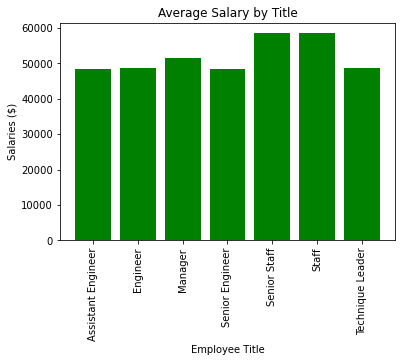

In [20]:
#Create a bar chart of average salary by title
x_axis = title_salary_df["title"]
ticks = np.arange(len(x_axis))
y_axis = title_salary_df["salary"]
plt.bar(x_axis, y_axis, align="center", alpha=1.0, color=["green"])
plt.xticks(ticks, x_axis, rotation="vertical")
#plot labels
plt.ylabel("Salaries ($)")
plt.xlabel("Employee Title")
plt.title("Average Salary by Title")
#save plot 
plt.savefig("./Images/avg_salary_by_title.png")
#show plot
plt.show()

----------------------------------------------------------------------------------------